Importamos las librerías necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creamos una clase `Interruptor` que tiene como métodos `verificar_vida`, `aplicar_dano`, `cant_fallos`, entre otras.

In [42]:
class Interruptor:
    def __init__(self):
        self.dano = np.zeros(5) 
        self.dano_historial = []

    def verificar_vida(self):
        return not all(self.dano > 100)

    def aplicar_dano(self, retornar = False, verbose = True):
        if not self.verificar_vida():
            print("Todas las componentes están muertas. No se puede aplicar más daño.")
            return None
        
        alpha = np.random.uniform(0.75, 1.5)
        beta  = np.random.uniform(2.75, 3.25)
        dano  = 10 * np.random.beta(alpha, beta)
        
        comp_danables  = np.where(self.dano < 100)[0]  # índices
        n_comp_a_danar = np.random.randint(1, len(comp_danables)+1)
        
        comp_a_danar = np.argsort(self.dano[comp_danables])[:n_comp_a_danar]
        
        # calculamos y guardamos los daños a cada componente en esta falla
        aux_danos = np.zeros(5)
        aux_danos[comp_danables[comp_a_danar]] += dano/n_comp_a_danar
        self.dano_historial.append(aux_danos)
        
        # actualizamos daños a componentes en esta falla
        self.dano += aux_danos
        
        if any(self.dano > 100) and verbose:
            print(f'Hay {len(np.where(self.dano > 100)[0])} componente(s) muerta(s).')
        
        return self.dano_historial if retornar else None 
        
    def mostrar_dano(self):
        print(f'Daño a las componentes: {self.dano}')
        
    def mostrar_vida(self):
        print(f'Vida de las componentes: {100-self.dano}')
        
    def cant_fallos(self):
        (
            print(f'El equipo lleva {len(self.dano_historial)} fallos, continua operativo.')
            if self.verificar_vida() else 
            print(f'El equipo soportó {len(self.dano_historial)} fallos, se encuentra inoperativo.') 
        )

In [49]:
interruptor = Interruptor()

interruptor.mostrar_vida()

Vida de las componentes: [100. 100. 100. 100. 100.]


In [50]:
interruptor.verificar_vida()

True

In [51]:
interruptor.cant_fallos()

El equipo lleva 0 fallos, continua operativo.


In [52]:
%%time
while interruptor.verificar_vida():
    interruptor.aplicar_dano()
interruptor.cant_fallos()
interruptor.mostrar_dano()
interruptor.mostrar_vida()

Hay 3 componente(s) muerta(s).
Hay 5 componente(s) muerta(s).
El equipo soportó 166 fallos, se encuentra inoperativo.
Daño a las componentes: [101.03068811 101.65096519 101.8252261  101.08686866 101.76306209]
Vida de las componentes: [-1.03068811 -1.65096519 -1.8252261  -1.08686866 -1.76306209]
CPU times: total: 0 ns
Wall time: 12.1 ms


In [53]:
interruptor.aplicar_dano()

Todas las componentes están muertas. No se puede aplicar más daño.


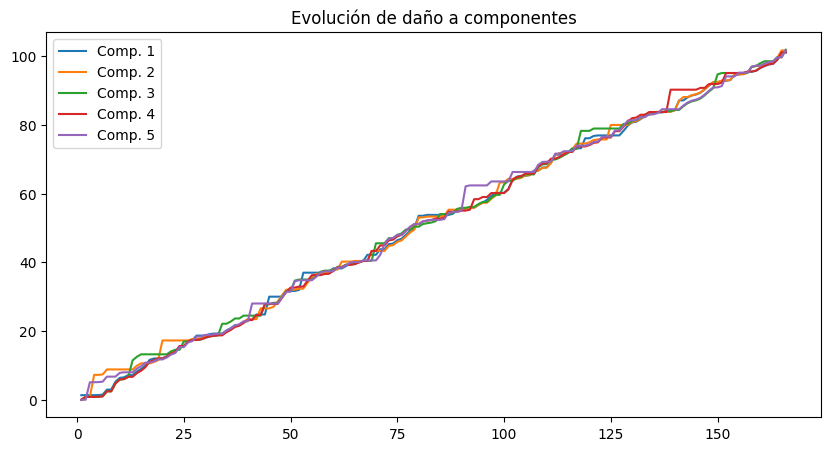

In [54]:
historial = np.array(interruptor.dano_historial)

plt.figure(figsize=(10,5))
for comp in range(1,5+1):
    plt.plot(np.arange(1,historial.shape[0]+1), np.cumsum(historial[:,comp-1]),
             label=f'Comp. {comp}')
plt.title('Evolución de daño a componentes')
plt.legend();

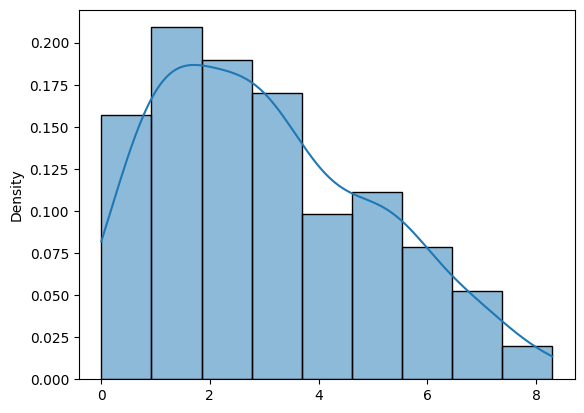

In [55]:
sns.histplot(np.array(interruptor.dano_historial).sum(axis=1), kde=True, stat='density');

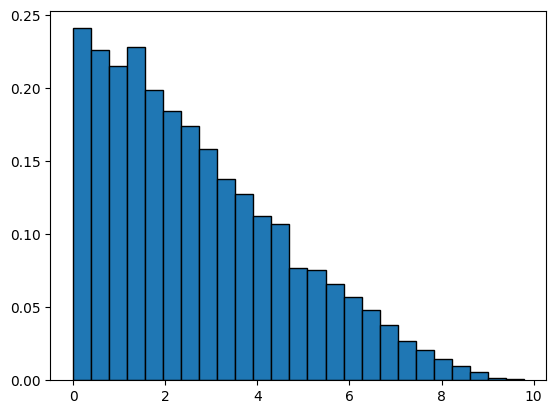

In [56]:
plt.hist([Interruptor().aplicar_dano(True)[0].sum() for _ in range(10_000)],
         edgecolor='k', bins=25, density=True);

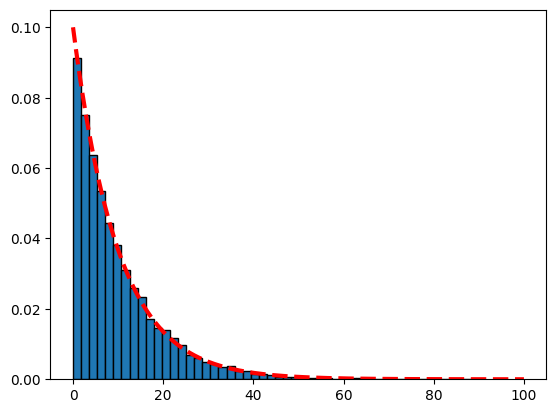

In [57]:
x = np.linspace(0,100,1_000)
lamb = 10
plt.hist(np.random.exponential(lamb, 10_000), bins = 50,
         density = True, zorder = 0, edgecolor = 'k')
plt.plot(x, np.exp(- x / lamb) / lamb, ls='--', lw=3, c='r');

In [82]:
interruptor = Interruptor()
tiempos = []
while interruptor.verificar_vida():
    tiempos.append(np.random.exponential(10))
    interruptor.aplicar_dano()
interruptor.cant_fallos()
np.sum(tiempos)

Hay 1 componente(s) muerta(s).
Hay 1 componente(s) muerta(s).
Hay 2 componente(s) muerta(s).
Hay 3 componente(s) muerta(s).
Hay 3 componente(s) muerta(s).
Hay 5 componente(s) muerta(s).
El equipo soportó 169 fallos, se encuentra inoperativo.


1484.7305529989126

In [83]:
np.array(interruptor.dano_historial).sum()

503.8784466065847

In [74]:
tiempo_esperados = []
cant_fallos = []
for _ in range(10_000):
    interruptor = Interruptor()
    tiempo_esperado = 0
    while interruptor.verificar_vida():
        tiempo_esperado += np.random.exponential(10)
        interruptor.aplicar_dano(verbose=False)
    cant_fallos.append(np.array(interruptor.dano_historial).shape[0])
    tiempo_esperados.append(tiempo_esperado)

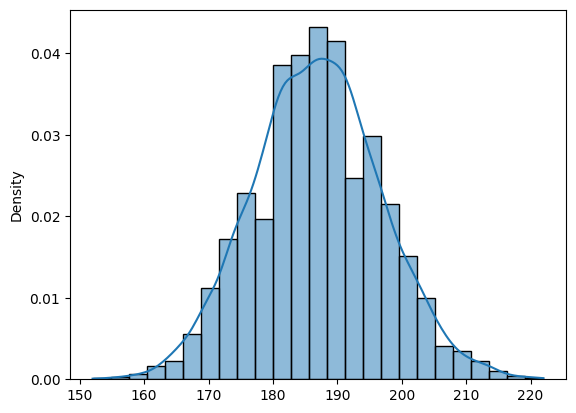

In [75]:
sns.histplot(cant_fallos, stat='density', bins=25, kde=True);

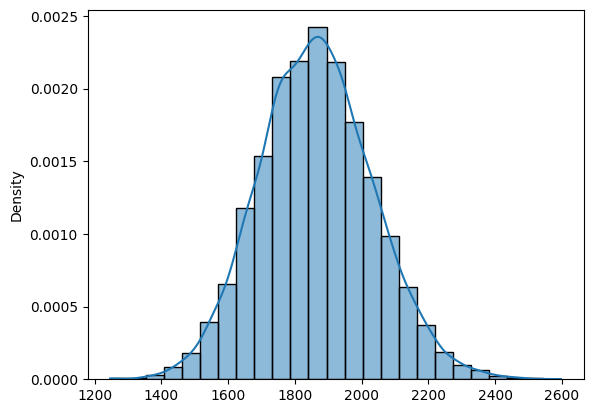

In [76]:
sns.histplot(tiempo_esperados, stat='density', bins=25, kde=True);

In [122]:
interruptores = [Interruptor() for _ in range(100)]
tiempo_esperado = 0
while all([interruptor.verificar_vida() for interruptor in interruptores]):
    tiempo_esperado += np.random.exponential(10)
    for interruptor in interruptores:    
        interruptor.aplicar_dano(verbose=False)
tiempo_esperado

1660.8026959305446